In [19]:
import pandas, numpy, scipy, fastcluster, seaborn, sklearn
import scipy.cluster.hierarchy as shc
import matplotlib.pyplot as plt
from sklearn import metrics
from scipy import stats


## functions & options


In [6]:
input_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7//0 in_silico/Python/1)data_input/'
output_file_directory = '/Users/kja11/OneDrive - Háskóli Íslands/PhD ATG7/0 in_silico/Python/3)output/'

# I] Dataframe settings

In [ ]:
# %%time
# #Download the big expression data with all the transcripts
# path = input_file_directory + "/xenabrowser_brut_data/all_transcripts/gtex_Kallisto_tpm.tsv"
# df_expr_all_tr = pandas.read_csv(path, sep = "\t", index_col='sample')

# print(df_expr_all_tr.shape)
# df_expr_all_tr.head()

In [ ]:
#Do a subset to practice and save it

In [ ]:
# # 10% of the transcrits for 10% of the samples
# df_gexpr_all_smallpart = df_expr_all_tr.iloc[:19704,:786]

# #save to csv
# path = "/xenabrowser_brut_data/all_transcripts/"
# df_gexpr_all_smallpart.to_csv(input_file_directory+path+'gtex_Kallisto_tpm_smallpart.tsv',sep = "\t")

In [22]:
%%time
#Download 10% of thebig expression data with all the transcripts
path = input_file_directory + "/xenabrowser_brut_data/all_transcripts/gtex_Kallisto_tpm_smallpart.tsv"
df_gexpr_all_smallpart = pandas.read_csv(path, sep = "\t")

print(df_gexpr_all_smallpart.shape)
df_gexpr_all_smallpart.set_index('sample', inplace = True)
df_gexpr_all_smallpart.index.name = None
df_gexpr_all_smallpart.head()

(19704, 787)
Wall time: 2.35 s


,GTEX-S4Q7-0003-SM-3NM8M,GTEX-QV31-1626-SM-2S1QC,GTEX-13OW5-0626-SM-5J2N2,GTEX-ZPCL-0126-SM-4WWC8,GTEX-S33H-1226-SM-4AD69,GTEX-X88G-0426-SM-47JZ5,GTEX-ZAKK-0326-SM-5EGHA,GTEX-1399S-1726-SM-5L3DI,GTEX-ZF29-0926-SM-4WKFZ,GTEX-13W3W-2626-SM-5SIA2,...,GTEX-13NYB-2726-SM-5J2MT,GTEX-WEY5-0526-SM-3GIKZ,GTEX-WZTO-1326-SM-3NM8X,GTEX-13NYS-2926-SM-5IFGH,GTEX-11DXZ-0326-SM-5EGH1,GTEX-13PVQ-2726-SM-5L3H7,GTEX-WL46-0011-R7A-SM-3LK7X,GTEX-11GSP-0006-SM-5N9EL,GTEX-1399U-2526-SM-5L3DL,GTEX-ZTTD-0326-SM-57WFW
ENST00000548312.5,0.6076,-9.9658,-2.0383,-2.4547,-9.9658,-2.0296,-2.8442,-2.8942,-9.9658,-4.1466,...,-9.9658,-2.9253,-5.1778,-0.9757,-3.7210,-9.9658,-9.9658,-3.3207,-3.6066,-2.8274
ENST00000527779.1,2.6670,-0.3332,1.9686,0.8771,0.5483,0.8687,-1.4169,0.7208,-0.0964,-2.5380,...,-2.1829,-9.9658,-9.9658,1.3433,-1.1996,-0.2697,-2.8383,-1.7300,-0.4357,-0.1985
ENST00000454820.5,-9.9658,-9.9658,-4.0293,-9.9658,-9.9652,-3.0899,-9.9658,-9.9658,-9.9658,-9.9658,...,-9.9658,-9.9658,-9.9658,-9.9658,-9.9658,-9.9653,-9.9658,-6.5950,-7.7254,-9.9658
ENST00000535093.1,3.2928,0.8198,1.7315,-0.0599,0.0884,0.0295,-0.9753,0.8344,0.5548,-1.7844,...,-9.9658,-9.9658,-1.3200,-0.3266,-9.9658,-1.3678,-9.9658,-2.8688,-1.4905,0.9818
ENST00000346219.7,-9.9658,-7.7128,-1.4648,-8.9045,-9.9658,-9.9658,-9.9658,-1.4929,-9.9658,-4.2916,...,-9.9658,-9.9658,-5.0633,0.6634,-9.2692,-2.3985,-4.1396,-9.9658,-5.6737,-9.9658


In [51]:
#10% of the 10%
small_smallpart = df_gexpr_all_smallpart.iloc[:1970,:78]

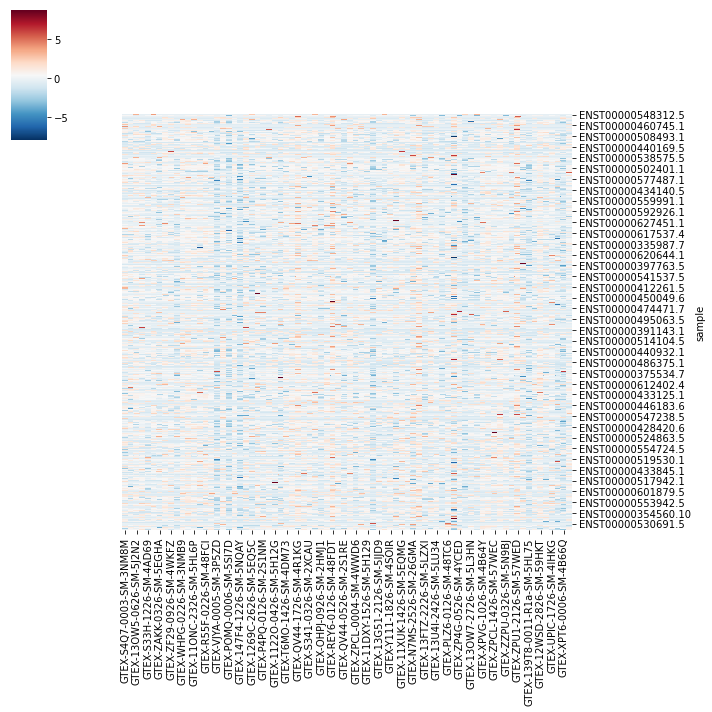

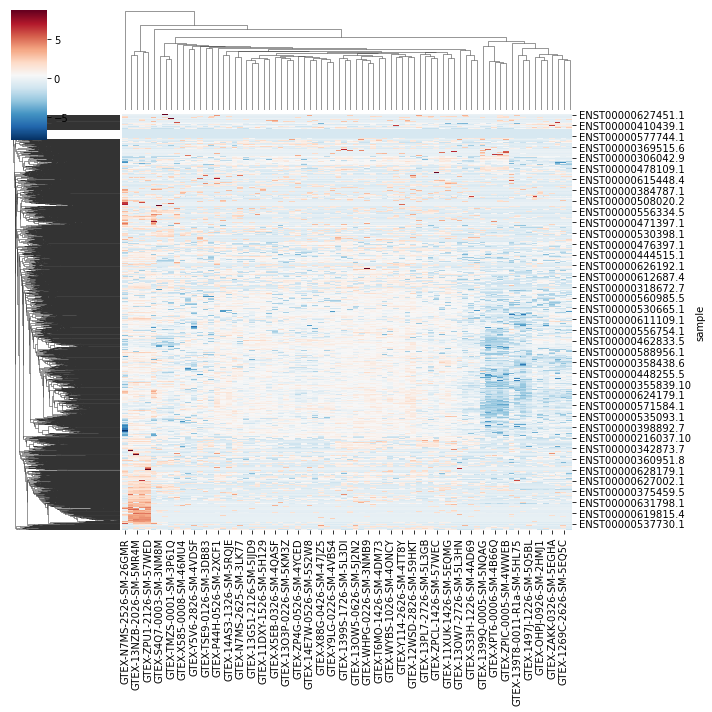

In [13]:
#plot cluster heatmap based on Zscore
seaborn.clustermap(small_smallpart,z_score=0, col_cluster=False,row_cluster=False, cmap="RdBu_r") 
seaborn.clustermap(small_smallpart,z_score=0, cmap="RdBu_r") 

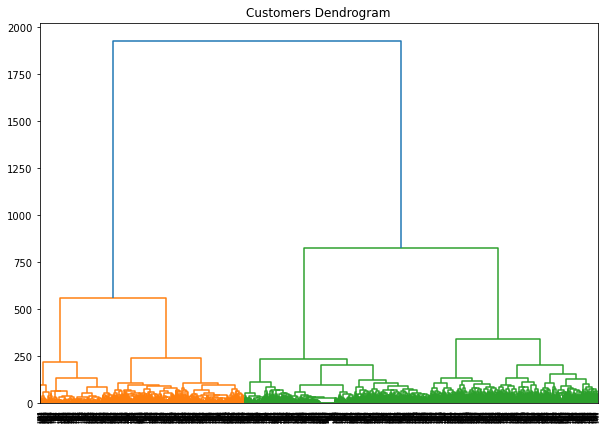

In [43]:
%%time
#^mot Dendrogram to see the cluster Tree
plt.figure(figsize=(10, 7))
plt.title("Customers Dendrogram")

# Selecting Annual Income and Spending Scores by index
clusters = shc.linkage(small_smallpart, 
            method='ward', 
            metric="euclidean")
shc.dendrogram(Z=clusters)
plt.show()

In [57]:
#evaluate the goodness score for each cluster to select the best possibility.
cluster_numbers = list(range(2, 40))
number_clust_L = [] 
goodness_L = []
for nb in cluster_numbers:
    kmeans_model = KMeans(n_clusters = nb, random_state=1).fit(small_smallpart)
    labels = kmeans_model.labels_
    gn = metrics.calinski_harabasz_score(small_smallpart, labels)
    number_clust_L.append(nb)
    goodness_L.append(gn)

In [59]:
#Convert values in dataframe
d = dict(Number = number_clust_L, Goodness = goodness_L)
df = pandas.DataFrame.from_dict(d, orient='columns')
df.head()

,Number,Goodness
0,2,1853.892192
1,3,1279.560979
2,4,974.903322
3,5,778.276327
4,6,646.579768


In [61]:
df.iloc[:]

Number         3.000000
Goodness    1279.560979
Name: 1, dtype: float64

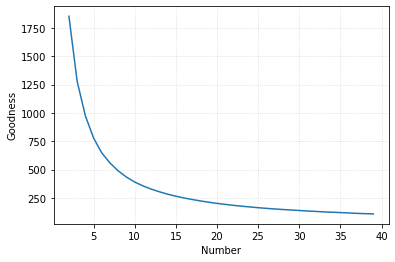

In [64]:
seaborn.lineplot(data = df, x = 'Number', y = 'Goodness')
plt.grid(ls=':', alpha = 0.5)